In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [57]:
data = pd.read_csv('preprocessedData.csv')

In [58]:
data.head()

,duration,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance,temp_category,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover
0,608,1,noon,0.274358,0.279310,less,45.0,69.0,9.0,1.0,0.0,5.0
1,662,1,noon,0.274358,0.275123,less,45.0,69.0,9.0,1.0,0.0,5.0
2,343,1,rush_hour,0.274358,0.273022,less,44.0,64.0,9.0,4.0,0.0,3.0
3,329,1,rush_hour,0.274358,0.277060,less,44.0,63.0,10.0,12.0,0.0,5.0
4,446,1,rush_hour,0.274358,0.279954,less,44.0,63.0,10.0,12.0,0.0,5.0


In [4]:
data.temp_category = pd.get_dummies(data.temp_category, drop_first=True)

In [5]:
# data.time_of_day = pd.get_dummies(data.time_of_day)

In [6]:
# data.loc[data.temp_category == 'less', 'temp_category'] = 0
# data.loc[data.temp_category == 'between', 'temp_category'] = 1

In [7]:
data.loc[data.time_of_day == 'noon', 'time_of_day'] = 0.6
data.loc[data.time_of_day == 'rush_hour', 'time_of_day'] = 0.3
data.loc[data.time_of_day == 'night', 'time_of_day'] = 0.9
data.loc[data.time_of_day == 'early_morning', 'time_of_day'] = 0

In [8]:
data = data.dropna(subset=['start_station_id_distance', 'end_station_id_distance'])

In [9]:
data.shape

(59715, 12)

In [10]:
data = data.drop_duplicates(keep=False)

In [11]:
y = pd.DataFrame(data['duration'], columns=['duration'])

x = data.drop(columns=['duration'])

In [12]:
x.head()

,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance,temp_category,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover
0,1,0.6,0.274358,0.279310,1,45.0,69.0,9.0,1.0,0.0,5.0
1,1,0.6,0.274358,0.275123,1,45.0,69.0,9.0,1.0,0.0,5.0
2,1,0.3,0.274358,0.273022,1,44.0,64.0,9.0,4.0,0.0,3.0
3,1,0.3,0.274358,0.277060,1,44.0,63.0,10.0,12.0,0.0,5.0
4,1,0.3,0.274358,0.279954,1,44.0,63.0,10.0,12.0,0.0,5.0


In [13]:
y.head()

,duration
0,608
1,662
2,343
3,329
4,446


In [14]:
y['duration'] = y['duration'] / 60

In [15]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [16]:
# x_train.min(axis=0)

In [17]:
# x_train.max(axis=0)

In [18]:
scaler = preprocessing.MinMaxScaler()
x_train[['mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover']] = scaler.fit_transform(x_train[['mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover']])

/home/ana/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ana/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
x_test[['mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover']] = scaler.transform(x_test[['mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover']])

/home/ana/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# x_train.head()

In [21]:
# scaler = preprocessing.StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [22]:
x.time_of_day = x.time_of_day.astype('float64')

In [23]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_predicted = model.predict(x_test)

In [25]:
metrics.mean_squared_error(y_test, y_predicted)

30.28290086711344

In [26]:
y_train_predicted = model.predict(x_train)
metrics.mean_squared_error(y_train, y_train_predicted)

30.506754073684043

In [333]:
np.random.seed(2813)

In [334]:
sample = np.random.randn(11)

predicted = model.predict(sample.reshape(1,-1))

predicted

array([[10.26970982]])

In [335]:
#finalni model

In [336]:
final = model.fit(x, y)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import boston_housing

In [340]:
# data = pd.read_csv('preprocessedData.csv')

In [341]:
# y = pd.DataFrame(data['duration'], columns=['duration'])

# x = data.drop(columns=['duration'])

In [342]:
# x_train, x_test,  y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [343]:
number_of_features = x_train.shape[1]
output_size = 1

In [384]:
model = Sequential()

In [385]:
# 500, 400, 300, and 100,

In [386]:
model.add(Dense(units = 500, input_dim = number_of_features, activation = 'relu'))

In [387]:
model.add(Dense(units = 400, activation = 'relu'))

In [388]:
model.add(Dense(units = 300, activation = 'relu'))

In [389]:
model.add(Dense(units = 100, activation = 'relu'))

In [390]:
model.add(Dense(units = output_size)) #ovde treba softmax

In [391]:
model.compile(optimizer='adam', loss='mse')

In [392]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               6000      
_________________________________________________________________
dense_9 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_10 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 356,901
Trainable params: 356,901
Non-trainable params: 0
_________________________________________________________________


In [393]:
history = model.fit(x_train, y_train, epochs= 100, batch_size=5500, verbose=1)

Epoch 1/100
39951/39951 [==============================] - 6s 149us/step - loss: 114.5827
Epoch 2/100
39951/39951 [==============================] - 6s 147us/step - loss: 46.2407
Epoch 3/100
39951/39951 [==============================] - 6s 158us/step - loss: 37.5799
Epoch 4/100
39951/39951 [==============================] - 6s 145us/step - loss: 34.1304
Epoch 5/100
39951/39951 [==============================] - 6s 144us/step - loss: 32.7221
Epoch 6/100
39951/39951 [==============================] - 6s 152us/step - loss: 31.7474
Epoch 7/100
39951/39951 [==============================] - 6s 141us/step - loss: 31.2460
Epoch 8/100
39951/39951 [==============================] - 6s 148us/step - loss: 30.9807
Epoch 9/100
39951/39951 [==============================] - 6s 140us/step - loss: 30.8294
Epoch 10/100
39951/39951 [==============================] - 6s 161us/step - loss: 30.7344
Epoch 11/100
39951/39951 [==============================] - 7s 168us/step - loss: 30.6609
Epoch 12/100
39951

39951/39951 [==============================] - 9s 231us/step - loss: 30.1174
Epoch 93/100
39951/39951 [==============================] - 8s 195us/step - loss: 30.1101
Epoch 94/100
39951/39951 [==============================] - 7s 177us/step - loss: 30.1341
Epoch 95/100
39951/39951 [==============================] - 9s 215us/step - loss: 30.1526
Epoch 96/100
39951/39951 [==============================] - 7s 186us/step - loss: 30.1074
Epoch 97/100
39951/39951 [==============================] - 8s 191us/step - loss: 30.1180
Epoch 98/100
39951/39951 [==============================] - 8s 194us/step - loss: 30.0894
Epoch 99/100
39951/39951 [==============================] - 7s 186us/step - loss: 30.0913
Epoch 100/100
39951/39951 [==============================] - 6s 158us/step - loss: 30.1464


In [409]:
epochs = history.epoch

In [410]:
loss = history.history['loss']

In [416]:
#prvih par loss-ova je veliko (100, 40,..) 
#isekla sam ih na drugom plotu da se vidi variranje pri kraju

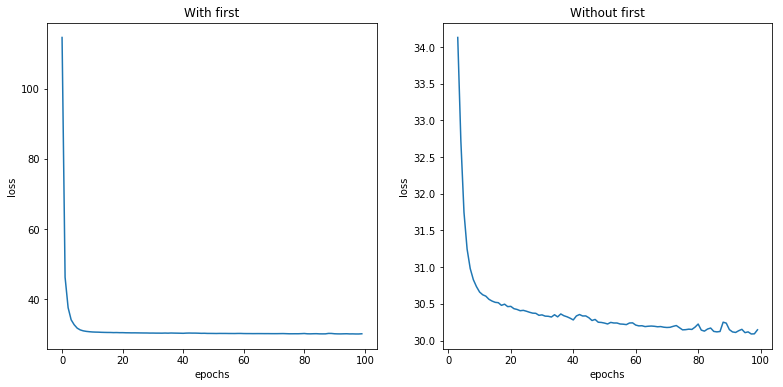

In [415]:
plt.figure(figsize=(13,6))

plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss)
plt.title('With first')

plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs[3:], loss[3:])
plt.title('Without first')

plt.show()

In [397]:
model.evaluate(x_test, y_test)

19678/19678 [==============================] - 3s 160us/step


29.965854373570924

In [402]:
model.predict(sample.reshape(1,-1))

array([[31.439865]], dtype=float32)

In [435]:
data.duration.max()

11.996666666666666

In [27]:
from keras import losses, optimizers

/home/ana/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [176]:
data = pd.read_csv('preprocessedData.csv')

In [177]:
data['duration'] = (data['duration'] / 60) / 5

In [178]:
bins = range(0, 11, 1)
data['duration'] = pd.cut(data['duration'], bins)

In [179]:
data = data.dropna(subset=['duration', 'end_station_id_distance', 'start_station_id_distance'])

In [180]:
#ovde treba sve kategoricke pretvoriti u numericke. Doradi to sutra

In [189]:
data.temp_category = pd.get_dummies(data.temp_category, drop_first=True)

data.loc[data.time_of_day == 'noon', 'time_of_day'] = 0.6
data.loc[data.time_of_day == 'rush_hour', 'time_of_day'] = 0.3
data.loc[data.time_of_day == 'night', 'time_of_day'] = 0.9
data.loc[data.time_of_day == 'early_morning', 'time_of_day'] = 0

data = data.dropna(subset=['start_station_id_distance', 'end_station_id_distance'])

data = data.drop_duplicates(keep=False)

y = pd.DataFrame(data['duration'], columns=['duration'])

x = data.drop(columns=['duration'])

x.time_of_day = x.time_of_day.astype('float64')

In [190]:
y.duration.unique()

[(2, 3], (1, 2], (4, 5], (3, 4], (6, 7], (5, 6], (7, 8], (8, 9], (9, 10]]
Categories (9, interval[int64]): [(1, 2] < (2, 3] < (3, 4] < (4, 5] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

In [191]:
y['duration'] = y.duration.cat.codes

In [192]:
y.duration.unique()

array([2, 1, 4, 3, 6, 5, 7, 8, 9])

In [185]:
from keras.utils.np_utils import to_categorical

In [194]:
y = to_categorical(y.duration)

In [238]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = data['duration'])

In [239]:
number_of_features = x_train.shape[1]
output_size = y.shape[1]

In [240]:
model = Sequential()

In [241]:
model.add(Dense(units = 500, input_dim = number_of_features, activation = 'relu'))

In [242]:
model.add(Dense(units = 400, activation = 'relu'))

In [243]:
model.add(Dense(units = 300, activation = 'relu'))

In [244]:
model.add(Dense(units = 100, activation = 'relu'))

In [245]:
model.add(Dense(units = output_size, activation = 'sigmoid'))

In [246]:
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [247]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 500)               6000      
_________________________________________________________________
dense_52 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_53 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_54 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1010      
Total params: 357,810
Trainable params: 357,810
Non-trainable params: 0
_________________________________________________________________


In [264]:
history = model.fit(x_train, y_train, epochs=80, batch_size=5500, verbose=1, validation_split=0.2)

Train on 37454 samples, validate on 9364 samples
Epoch 1/80
37454/37454 [==============================] - 11s 286us/step - loss: 1.0884 - acc: 0.5706 - val_loss: 1.0922 - val_acc: 0.5709
Epoch 2/80
37454/37454 [==============================] - 8s 221us/step - loss: 1.0882 - acc: 0.5706 - val_loss: 1.0920 - val_acc: 0.5709
Epoch 3/80
37454/37454 [==============================] - 8s 214us/step - loss: 1.0874 - acc: 0.5706 - val_loss: 1.0913 - val_acc: 0.5709
Epoch 4/80
37454/37454 [==============================] - 9s 244us/step - loss: 1.0875 - acc: 0.5706 - val_loss: 1.0922 - val_acc: 0.5709
Epoch 5/80
37454/37454 [==============================] - 10s 275us/step - loss: 1.0870 - acc: 0.5706 - val_loss: 1.0917 - val_acc: 0.5709
Epoch 6/80
37454/37454 [==============================] - 9s 236us/step - loss: 1.0871 - acc: 0.5706 - val_loss: 1.0941 - val_acc: 0.5709
Epoch 7/80
37454/37454 [==============================] - 9s 240us/step - loss: 1.0881 - acc: 0.5706 - val_loss: 1.0927 -

37454/37454 [==============================] - 8s 216us/step - loss: 1.0861 - acc: 0.5706 - val_loss: 1.0907 - val_acc: 0.5709
Epoch 60/80
37454/37454 [==============================] - 8s 210us/step - loss: 1.0850 - acc: 0.5706 - val_loss: 1.0912 - val_acc: 0.5709
Epoch 61/80
37454/37454 [==============================] - 8s 215us/step - loss: 1.0843 - acc: 0.5706 - val_loss: 1.0903 - val_acc: 0.5709
Epoch 62/80
37454/37454 [==============================] - 8s 215us/step - loss: 1.0838 - acc: 0.5706 - val_loss: 1.0905 - val_acc: 0.5709
Epoch 63/80
37454/37454 [==============================] - 8s 215us/step - loss: 1.0843 - acc: 0.5706 - val_loss: 1.0907 - val_acc: 0.5709
Epoch 64/80
37454/37454 [==============================] - 8s 214us/step - loss: 1.0857 - acc: 0.5706 - val_loss: 1.0925 - val_acc: 0.5709
Epoch 65/80
37454/37454 [==============================] - 8s 215us/step - loss: 1.0843 - acc: 0.5706 - val_loss: 1.0916 - val_acc: 0.5709
Epoch 66/80
37454/37454 [==============

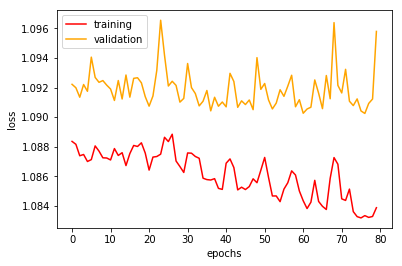

In [265]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

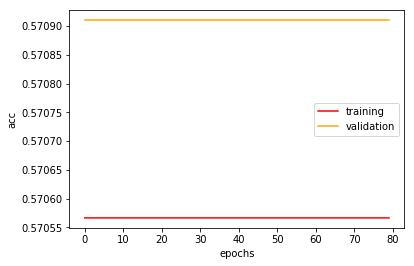

In [266]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [267]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

5202/5202 [==============================] - 2s 314us/step
Test loss: 1.09681650172, test accuracy: 0.570742022276
